# 数据集

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import mpl
import warnings 

np.set_printoptions(suppress=True, threshold=np.inf,precision=4)

warnings.filterwarnings("ignore")
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

%matplotlib inline
plt.style.use('Solarize_Light2') #给图片指定风格


boston = load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['price'] = boston.target
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


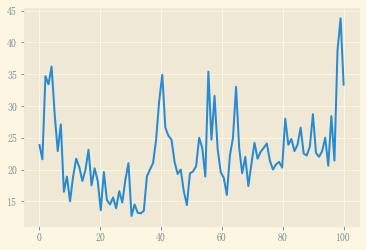

In [2]:
y = df["price"][:100]
x = np.linspace(0,100,len(y))
plt.plot(x,y)

# 线性回归

* 损失函数

In [3]:
def cost(y1,y2):
    return np.sum(np.power(y1-y2,2))/2
y1 = np.array([1,2,3])
y2 = np.array([0,0,4])
cost(y1,y2)

3.0

* 直接求解w

In [4]:
data = np.array(df.iloc[:,:])[:100]
X,y = data[:,:-1],data[:,-1]
X.shape,y.shape

X = np.c_[X,np.ones(X.shape[0])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((80, 14), (20, 14), (80,), (20,))

In [5]:
w = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
w

array([ -4.7448,   0.0081,  -0.137 ,   0.    ,  23.6908,   8.404 ,
        -0.0682,   0.1857,   0.0604,  -0.0105,   0.2915,  -0.0062,
        -0.0023, -36.4307])

In [6]:
y_pred = X_test.dot(w)
y_pred.shape

(20,)

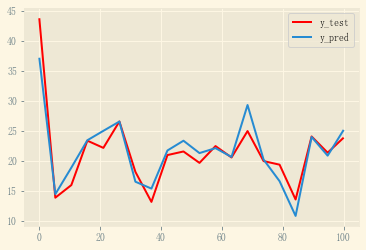

In [7]:
x = np.linspace(0,100,len(y_test))
a = plt.plot(x,y_test,'r-')
b = plt.plot(x,y_pred)

plt.legend([a,b],labels=['y_test','y_pred'])

In [8]:
cost(y_test,y_pred)

55.116844915568954

* 梯度下降

In [33]:
Xy = np.c_[X_train,y_train]

X,y = Xy[:,:-1],Xy[:,-1]
X=X.astype('float')
y=y.astype('float')
n,m = X.shape
w=np.random.random(size=(m,1))
eta=0.0000001
epochs = 10000


for _ in range(epochs):
    np.random.shuffle(Xy)
    for i in range(n):
        x_i = Xy[i,:-1].reshape(m,1)
        y_i = Xy[i,-1:]
        w = w-eta*(x_i.dot(x_i.T.dot(w)-y_i))
w

((80, 14), (80,))

In [34]:
w.shape

(14, 1)

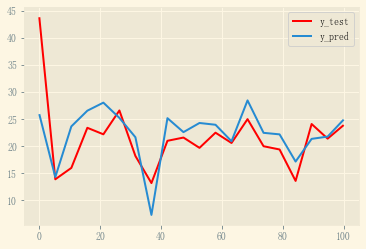

In [10]:
y_pred = X_test.dot(w)

x = np.linspace(0,100,len(y_test))
a = plt.plot(x,y_test,'r-')
b = plt.plot(x,y_pred)

plt.legend([a,b],labels=['y_test','y_pred'])

In [31]:
Xy = np.c_[X_train,y_train]

X,y = Xy[:,:-1],Xy[:,-1]
X=X.astype('float')
Y=y.astype('float')
Y = Y.reshape(-1,1)
# n,m = X.shape

# 初始化
w = np.random.random(size=(m,1))
# 迭代次数
epoches = 100000
# eta参数
eta = 0.0000001

#记录loss变化(损失)
losses = []
for e in range(epoches):
    w = w - eta*(X.T.dot(X.dot(w)-Y))
    # reshape(-1)：变成一维数组
#     losses.append((Y-X.dot(w)).T.dot(Y-X.dot(w)).reshape(-1)) # （2）
w

array([[ 0.0744],
       [ 0.0033],
       [-0.2246],
       [ 0.8896],
       [ 0.7627],
       [ 1.1218],
       [ 0.0048],
       [ 0.3231],
       [ 0.0001],
       [-0.014 ],
       [ 0.047 ],
       [ 0.0594],
       [-0.5553],
       [ 0.6759]])

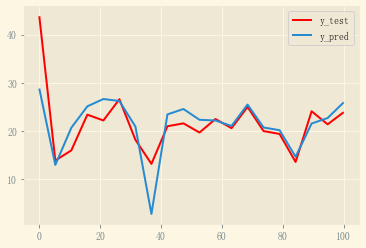

In [32]:
y_pred = X_test.dot(w)

x = np.linspace(0,100,len(y_test))
a = plt.plot(x,y_test,'r-')
b = plt.plot(x,y_pred)

plt.legend([a,b],labels=['y_test','y_pred'])

* 小批量梯度下降法

# 多项式回归